In [265]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import json
import json_flatten
import fotmob_scraper as fms
from tqdm import tqdm

In [266]:
df_teams = pd.read_csv('data/super_leagues_team_stats_2122.csv')

In [267]:
df_games = pd.read_csv('data/super_leagues_game_stats_2122.csv')

In [268]:
team_colors: dict = {
    'BAS': '#FF1433', 
    'ZUR': '#00BFFF', 
    'GRA': '#0064B9', 
    'LAU': '#006EB7', 
    'LUG': '#000000', 
    'LUZ': '#154281', 
    'SER': '#870E26', 
    'SIO': '#EC1F00', 
    'GAL': '#008141',
    'YB': '#FFD940', 
    'AVG': '#FFFFFF'
}

In [269]:
df_teams

,Unnamed: 0,team,team_short,ball_possession_mean,expected_goals_(xg)_mean,total_shots_mean,big_chances_mean,big_chances_missed_mean,accurate_passes_mean,fouls_committed_mean,...,expected_goals_against_(xga)_sum,xga_first_half_sum,xga_second_half_sum,xga_open_play_sum,xga_set_play_sum,xga_on_target_(xgaot)_sum,xg_penalty_sum,xga_penalty_sum,goals_against_over_expected_sum,goals_over_expected_sum
0,0,Basel,BAS,56.363636,2.200455,15.318182,3.136364,1.500000,390.818182,10.272727,...,36.17,15.22,20.95,24.60,6.13,28.82,0.79,0.79,-11.17,-0.41
1,1,FC Zürich,ZUR,46.818182,1.892727,15.500000,2.454545,1.000000,296.272727,11.090909,...,31.57,16.06,15.54,23.04,5.86,33.11,0.00,0.00,-3.57,9.36
2,2,Grasshopper,GRA,50.409091,1.618182,12.772727,2.500000,1.409091,324.090909,14.454545,...,34.20,12.23,21.90,20.92,7.27,31.38,1.57,1.58,-1.20,1.40
3,3,Lausanne,LAU,44.636364,1.006818,10.454545,1.181818,0.772727,308.636364,12.636364,...,44.75,14.44,30.32,30.52,5.60,40.92,1.58,1.57,3.25,-3.15
4,4,Lugano,LUG,49.954545,1.403636,12.818182,1.909091,1.090909,342.409091,12.727273,...,32.04,15.02,16.99,19.14,6.85,30.03,0.00,0.00,-1.04,-3.88
5,5,Luzern,LUZ,50.500000,1.135909,14.272727,1.090909,0.590909,337.681818,11.181818,...,39.01,17.51,21.44,28.41,6.83,43.38,0.00,0.00,2.99,-1.99
6,6,Servette,SER,51.772727,1.759091,14.500000,2.454545,1.500000,372.318182,11.772727,...,32.07,14.15,17.93,21.04,5.51,32.94,0.79,0.79,7.93,-3.70
7,7,Sion,SIO,43.363636,1.265000,11.318182,1.454545,0.727273,269.136364,12.090909,...,43.59,19.29,24.29,32.60,7.10,35.02,0.79,0.79,-3.59,2.17
8,8,St. Gallen,GAL,49.909091,1.663636,14.318182,2.363636,1.272727,289.318182,10.681818,...,39.44,16.67,22.78,26.18,11.69,38.28,0.00,0.00,4.56,0.40
9,9,Young Boys,YB,56.272727,2.182273,19.409091,2.590909,1.136364,361.909091,11.681818,...,21.97,9.96,12.05,13.81,5.02,22.88,0.79,0.79,6.03,3.99


In [270]:
df_teams.columns

Index(['Unnamed: 0', 'team', 'team_short', 'ball_possession_mean',
       'expected_goals_(xg)_mean', 'total_shots_mean', 'big_chances_mean',
       'big_chances_missed_mean', 'accurate_passes_mean',
       'fouls_committed_mean',
       ...
       'expected_goals_against_(xga)_sum', 'xga_first_half_sum',
       'xga_second_half_sum', 'xga_open_play_sum', 'xga_set_play_sum',
       'xga_on_target_(xgaot)_sum', 'xg_penalty_sum', 'xga_penalty_sum',
       'goals_against_over_expected_sum', 'goals_over_expected_sum'],
      dtype='object', length=115)

In [271]:
df_teams['team_short']

0    BAS
1    ZUR
2    GRA
3    LAU
4    LUG
5    LUZ
6    SER
7    SIO
8    GAL
9     YB
Name: team_short, dtype: object

In [272]:
df_games[['team','team_short']]

,team,team_short
0,Luzern,LUZ
1,Young Boys,YB
2,Lausanne,LAU
3,St. Gallen,GAL
4,Lugano,LUG
...,...,...
215,FC Zürich,ZUR
216,Grasshopper,GRA
217,Young Boys,YB
218,Servette,SER


In [273]:
df_teams

,Unnamed: 0,team,team_short,ball_possession_mean,expected_goals_(xg)_mean,total_shots_mean,big_chances_mean,big_chances_missed_mean,accurate_passes_mean,fouls_committed_mean,...,expected_goals_against_(xga)_sum,xga_first_half_sum,xga_second_half_sum,xga_open_play_sum,xga_set_play_sum,xga_on_target_(xgaot)_sum,xg_penalty_sum,xga_penalty_sum,goals_against_over_expected_sum,goals_over_expected_sum
0,0,Basel,BAS,56.363636,2.200455,15.318182,3.136364,1.500000,390.818182,10.272727,...,36.17,15.22,20.95,24.60,6.13,28.82,0.79,0.79,-11.17,-0.41
1,1,FC Zürich,ZUR,46.818182,1.892727,15.500000,2.454545,1.000000,296.272727,11.090909,...,31.57,16.06,15.54,23.04,5.86,33.11,0.00,0.00,-3.57,9.36
2,2,Grasshopper,GRA,50.409091,1.618182,12.772727,2.500000,1.409091,324.090909,14.454545,...,34.20,12.23,21.90,20.92,7.27,31.38,1.57,1.58,-1.20,1.40
3,3,Lausanne,LAU,44.636364,1.006818,10.454545,1.181818,0.772727,308.636364,12.636364,...,44.75,14.44,30.32,30.52,5.60,40.92,1.58,1.57,3.25,-3.15
4,4,Lugano,LUG,49.954545,1.403636,12.818182,1.909091,1.090909,342.409091,12.727273,...,32.04,15.02,16.99,19.14,6.85,30.03,0.00,0.00,-1.04,-3.88
5,5,Luzern,LUZ,50.500000,1.135909,14.272727,1.090909,0.590909,337.681818,11.181818,...,39.01,17.51,21.44,28.41,6.83,43.38,0.00,0.00,2.99,-1.99
6,6,Servette,SER,51.772727,1.759091,14.500000,2.454545,1.500000,372.318182,11.772727,...,32.07,14.15,17.93,21.04,5.51,32.94,0.79,0.79,7.93,-3.70
7,7,Sion,SIO,43.363636,1.265000,11.318182,1.454545,0.727273,269.136364,12.090909,...,43.59,19.29,24.29,32.60,7.10,35.02,0.79,0.79,-3.59,2.17
8,8,St. Gallen,GAL,49.909091,1.663636,14.318182,2.363636,1.272727,289.318182,10.681818,...,39.44,16.67,22.78,26.18,11.69,38.28,0.00,0.00,4.56,0.40
9,9,Young Boys,YB,56.272727,2.182273,19.409091,2.590909,1.136364,361.909091,11.681818,...,21.97,9.96,12.05,13.81,5.02,22.88,0.79,0.79,6.03,3.99


In [274]:
df_teams.columns[df_teams.columns.str.contains("xga")]

Index(['expected_goals_against_(xga)_mean', 'xga_first_half_mean',
       'xga_second_half_mean', 'xga_open_play_mean', 'xga_set_play_mean',
       'xga_on_target_(xgaot)_mean', 'xga_penalty_mean',
       'expected_goals_against_(xga)_sum', 'xga_first_half_sum',
       'xga_second_half_sum', 'xga_open_play_sum', 'xga_set_play_sum',
       'xga_on_target_(xgaot)_sum', 'xga_penalty_sum'],
      dtype='object')

## Average xG per Game for Super League Teams

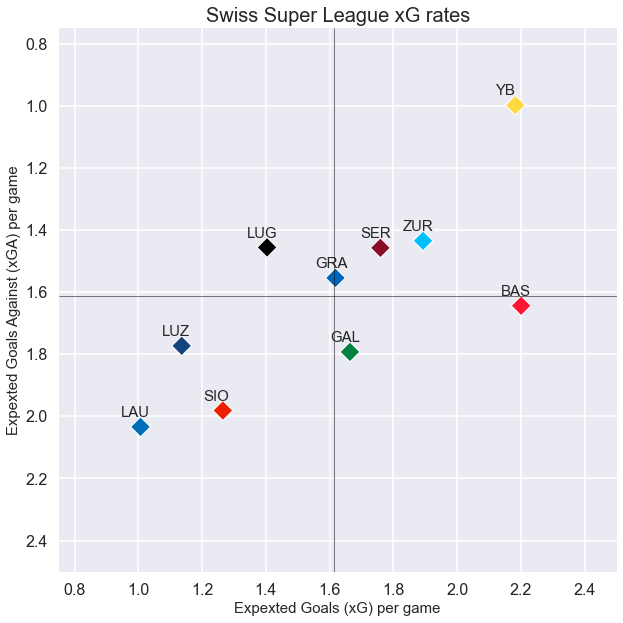

In [275]:
fig, ax = plt.subplots(figsize=(10,10))
plt.style.use(['seaborn-darkgrid','seaborn-poster'])
sns.scatterplot(x='expected_goals_(xg)_mean', y='expected_goals_against_(xga)_mean',hue='team_short',palette=team_colors,data=df_teams, s=200,legend=False,marker='D')
ax.set_xlabel('Expexted Goals (xG) per game',fontsize=15)
ax.set_ylabel('Expexted Goals Against (xGA) per game',fontsize=15)
ax.set_title('Swiss Super League xG rates',fontsize=20,)


ax.axvline(df_teams['expected_goals_against_(xga)_mean'].mean(), color='black', linewidth=0.5)
ax.axhline(df_teams['expected_goals_(xg)_mean'].mean(), color='black', linewidth=0.5)

ax.set_xlim(0.75,2.5)
ax.set_ylim(0.75,2.5)

ax.axes.invert_yaxis()

for a in df_teams['team_short']:
    ax.annotate(a, (df_teams.loc[df_teams['team_short'] == a,'expected_goals_(xg)_mean'].values[0],df_teams.loc[df_teams['team_short'] == a,'expected_goals_against_(xga)_mean'].values[0]), xytext=(-20,10), textcoords='offset points', fontsize=15)

plt.show()

fig.savefig('figs/super_league_xg_rates_23_02_22.jpg')

## Goals Over Expected for and against  

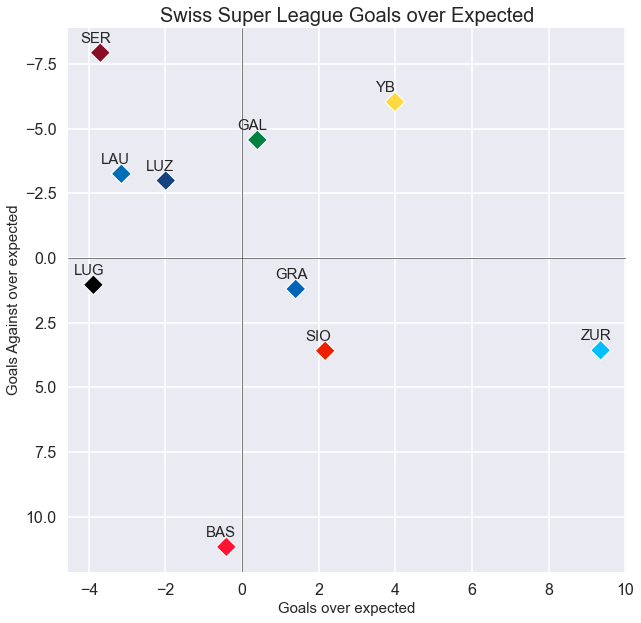

In [276]:
fig, ax = plt.subplots(figsize=(10,10))
plt.style.use(['seaborn-darkgrid','seaborn-poster'])
sns.scatterplot(x=df_teams['goals_over_expected_sum'], y=-df_teams['goals_against_over_expected_sum'],hue=df_teams['team_short'],palette=team_colors, s=200,legend=False,marker='D')
ax.set_xlabel('Goals over expected',fontsize=15)
ax.set_ylabel('Goals Against over expected',fontsize=15)
ax.set_title('Swiss Super League Goals over Expected',fontsize=20)


ax.axvline(0, color='black', linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.axes.invert_yaxis()

for a in df_teams['team_short']:
    ax.annotate(a, (df_teams.loc[df_teams['team_short'] == a,'goals_over_expected_sum'].values[0],-df_teams.loc[df_teams['team_short'] == a,'goals_against_over_expected_sum'].values[0]), xytext=(-20,10), textcoords='offset points', fontsize=15)

plt.show()

fig.savefig('figs/super_league_goals_over_expected_23_02_22.jpg')

## Rolling xG Rates over 5 games 

In [277]:
df_games['xg_diff'] = df_games['expected_goals_(xg)'] - df_games['expected_goals_against_(xga)']

In [278]:
df_games.columns

Index(['Unnamed: 0', 'ball_possession', 'expected_goals_(xg)', 'total_shots',
       'big_chances', 'big_chances_missed', 'accurate_passes',
       'fouls_committed', 'offsides', 'corners', 'shots_off_target',
       'shots_on_target', 'blocked_shots', 'shots_woodwork',
       'shots_inside_box', 'shots_outside_box', 'xg_first_half',
       'xg_second_half', 'xg_open_play', 'xg_set_play', 'xg_on_target_(xgot)',
       'passes', 'own_half', 'opposition_half', 'accurate_long_balls',
       'accurate_crosses', 'throws', 'tackles_won', 'interceptions', 'blocks',
       'clearances', 'keeper_saves', 'duels_won', 'ground_duels_won',
       'aerial_duels_won', 'dribbles_succeeded', 'yellow_cards', 'red_cards',
       'match_id', 'team', 'team_short', 'goals', 'goals_against',
       'match_round', 'pass_accuracy', 'longball_accuracy', 'cross_accuracy',
       'tackles_won_percentage', 'ground_duels_won_percentage',
       'aerial_duels_won_percentage', 'dribbles_succeeded_percentage',
       

In [279]:
#df_games.loc[(df_games['match_round'] == 4) & ((df_games['team'] == 'Young Boys') | (df_games['team'] == 'Lugano')),'match_round'] = 16

In [280]:
[team for team in df_games['team'].unique()]

['Luzern',
 'Young Boys',
 'Lausanne',
 'St. Gallen',
 'Lugano',
 'FC Zürich',
 'Grasshopper',
 'Basel',
 'Sion',
 'Servette']

In [281]:
df_rolling = pd.DataFrame()
#df_rolling['rolling_xg_Basel']= df_games.loc[df_games['team']=='Basel'].set_index('match_round').rolling(5).mean()['xg_diff']

In [282]:
for team in df_games['team'].unique():
    df_rolling['{}'.format(df_games.loc[df_games['team']==team,"team_short"].values[0])]= df_games.loc[df_games['team']==team].set_index('match_round').rolling(5,min_periods=1).sum()['xg_diff']

In [283]:
df_rolling

,LUZ,YB,LAU,GAL,LUG,ZUR,GRA,BAS,SIO,SER
match_round,,,,,,,,,,
1,-1.13,1.13,-1.36,1.36,0.39,-0.39,-0.38,0.38,-0.36,0.36
2,-0.74,2.74,-2.73,0.97,0.44,0.98,-1.99,5.12,-5.10,0.31
3,-2.21,3.61,-3.58,0.87,0.54,2.45,-1.14,9.19,-5.97,-3.76
4,-3.94,2.55,-5.14,2.41,0.29,3.51,-2.20,10.75,-7.51,-2.03
5,-3.81,3.48,-5.27,1.84,-0.15,4.08,-1.70,10.88,-6.82,-2.53
6,-3.79,6.79,-3.76,-1.84,-0.44,1.16,-0.21,10.79,-6.61,-0.57
7,-4.24,7.93,-4.66,-1.81,-0.77,-0.94,1.34,6.41,-1.81,0.21
8,-2.93,7.40,-4.14,-2.79,-0.66,-1.83,1.92,1.76,-2.37,4.61
9,-2.24,9.45,-4.59,-5.10,1.25,-1.56,3.75,1.24,-2.16,-0.04


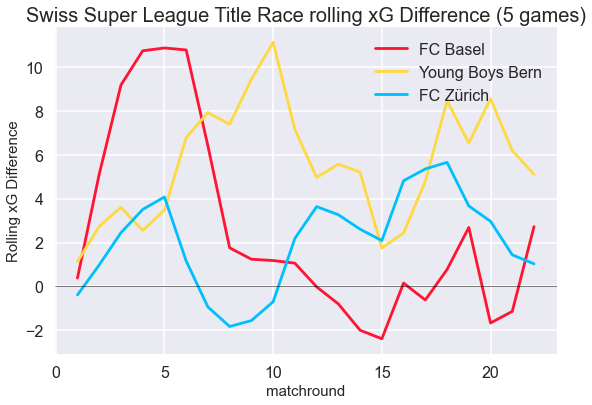

In [284]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use(['seaborn-darkgrid','seaborn-poster'])
sns.lineplot(x=df_rolling.index, y=df_rolling['BAS'], label='FC Basel', color=team_colors['BAS'])
sns.lineplot(x=df_rolling.index, y=df_rolling['YB'], label='Young Boys Bern',color=team_colors['YB'])
sns.lineplot(x=df_rolling.index, y=df_rolling['ZUR'], label='FC Zürich',color=team_colors['ZUR'])

ax.axhline(0, color='black', linewidth=0.5)
ax.set_xlabel('matchround',fontsize=15)
ax.set_ylabel('Rolling xG Difference',fontsize=15)
ax.set_title('Swiss Super League Title Race rolling xG Difference (5 games)',fontsize=20)
fig.savefig('figs/super_league_rolling_xg_difference_23_02_22.jpg')